In [69]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import math
np.random.seed(3)
r1 = np.random.rand(100)
weights = np.ceil(r1*10)

r2 = np.random.rand(100)
vals = np.ceil(r2*20)

print("")
print("Knapsack Problem")
print("weights")
print(weights)
print("values")
print(vals)

random_start = np.random.rand(100)
starting_state = np.where(random_start>0.5, 1, 0)

fitness = mlrose.Knapsack(weights, vals, 0.35)


#Random Hill Climbing
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)

# random_start = np.random.rand(100)
# starting_state = np.where(random_start>0.5, 1, 0)

# fitness = mlrose.Knapsack(weights, vals, 0.35)


# #Random Hill Climbing
# problem_fit = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)


Knapsack Problem
weights
[ 6.  8.  3.  6.  9.  9.  2.  3.  1.  5.  1.  5.  7.  3.  7.  6.  1.  6.
  3.  5.  3.  7.  5.  2.  6.  8.  4.  3.  4. 10. 10.  7. 10.  9.  4.  1.
  7.  6.  4.  3.  5.  5.  3.  3.  5.  9.  6.  3.  3.  5.  3.  3.  6.  1.
  5.  4.  8.  8.  7.  7.  4.  7.  4.  6.  4.  5.  1.  3. 10.  3.  7.  7.
  8.  5.  6.  1.  1.  2.  2.  2.  2.  6.  2. 10.  7.  6.  8.  3. 10.  9.
  8.  5.  9.  8.  7. 10.  7.  4.  6.  2.]
values
[ 4. 15. 16. 20. 18. 11.  2. 10. 19. 16. 10. 10.  5.  4.  2. 18. 13.  3.
  9.  1.  5. 15. 14. 10.  6. 14. 20.  9.  2.  2.  2. 20. 11. 17.  4.  6.
 14. 18.  7.  2. 18.  6. 15.  4. 14. 17. 15.  8. 15.  3.  7.  9. 18.  4.
 18. 16. 20.  8.  5.  5. 17. 20. 14. 10.  6. 17. 18.  2.  5. 17. 17.  7.
  6.  9. 11.  2. 17. 11. 16.  5. 20. 16.  7. 19. 15. 17.  1.  2. 15.  7.
 11.  4. 20. 11. 17.  2. 10.  2. 18.  9.]


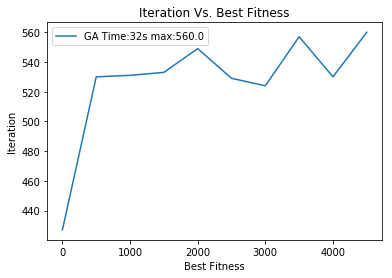

In [70]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=300, mutation_prob=0.1, \
        max_attempts = 50, max_iters = i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_GA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_GA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueGA= str(max(avg_best_fitness_GA[:,1]))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


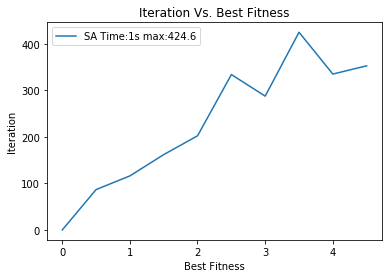

In [75]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=10
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule=mlrose.ExpDecay(),
        max_iters = i, init_state = starting_state)      #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_SA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_SA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))

maxValueSA= str(max(avg_best_fitness_SA[:,1]))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_SA[:,0]/1000, avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


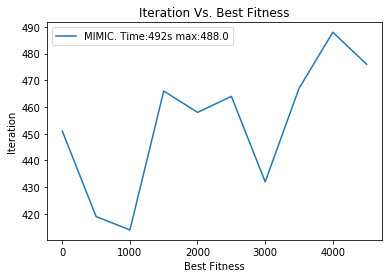

In [72]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 500):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.mimic(problem_fit, pop_size=300, keep_pct=0.2,\
            max_attempts = 10, max_iters = i)        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_MIMIC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_MIMIC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueMIMIC= str(max(avg_best_fitness_MIMIC[:,1]))

plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


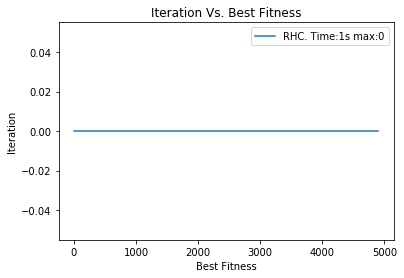

In [73]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=5000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 100):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters=i, init_state = starting_state)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_RHC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_RHC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueRHC= str(math.ceil(max(avg_best_fitness_RHC[:,1])))
#print(avg_best_fitness_RHC)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


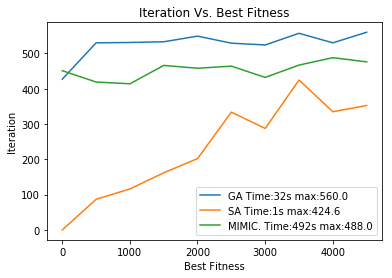

In [77]:
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
#plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)

plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()